<a href="https://colab.research.google.com/github/Anitayea/DS111/blob/main/HW3_AnitaYe_yy3557.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler     # feature scaling
from sklearn import metrics                          # for evaluation metrics

from sklearn.neighbors import KNeighborsClassifier   # knn
from sklearn.cluster import KMeans                   # kmeans

# additional metrics
from kneed import KneeLocator # for KMeans, elbow method
from yellowbrick.cluster import SilhouetteVisualizer # for KMeans, silhouette scores

1. 


(a) How is this researcher conceptualizing “approval” of Mayor Adams?

- The researcher conceptualized "approval" of Mayor Adams by collecting how supportive participates are of the policy changes Mayer Adam made while he was on office.  

(b) How is this researcher operationalizing “approval”?

- The researcher opertionalized "approval" through survey results on a scale from “very”, “somewhat”, “not really”, “not at all”, to “prefer not to say/no opinion/don’t know” collected to show the extent of support. 


(c) What is one strength of this measure of “approval”? Briefly explain why it’s a strength.
- One strength of this measure is that it used a scale on the survey which is easily quatified and interpreted. The results are straighforward statistically and easy to understand and explain to other people with the survey options that shows the extend of "supportiveness". 

(d) What is one weakness of this measure of “approval”? Briefly explain why it’s a weakness.
- This measure has sampling error since it is only collected from passersby in Times Square on a Saturday afternoon, and not including other place or time period. Although clear and easy to measure and statisticize, this measurement ignores detailed opinions and over-simplifies "supportiveness" of participants. Also, participants could potentially give answers that are against their real opinion because they do not want to be recognized. 

(e) What is one possible source of random error in the resulting dataset from this study?
- A possible random error could be noise in the background that interrupts the communication which could cause wrong message received or send by participants and researchers. 

(f) What is one possible sources of selection bias in this study?
- The results are only taken on a certain period of time and space, in this case, only opinions of people passing Time Square on Saturday afternoon was collected. Therefore, the sampling could be biased and not representative of the population. 

2. 


(a) Is de-anonymization only a concern when a large number features are associated with each observation? Briefly explain your answer.

- No, de-anoymization is always a concern even with small number of features. It does not require a large amount of information to occur. The writer took an example of phone numbers records and Google's database of user searches, and explained that they may all easily de-annoymize databases with their information and correlations. 

(b) Briefly discuss the trade-offs between privacy and taking an intersectional approach to research.

- Annoymous datasets provides plenty of help for researchers, yet with the amount of databases, the privacy is at high risk for to be violated as they become deanoymized easily. The data obviously helped researchers to collect data with deeper individualized analysis and more correlated information useful for more in-depth research. As the analysis becomes more in-depth, data naturally exposes people's private information in exchange for intersecational research with or without approval of both parties. 

(c) What are some ethical concerns you might have about conducting research in the digital age? Name at least ONE principle from the Belmont Report and describe EITHER why it is a potential concern OR why it is not a potential concern.

- The information and all the unintentionally leaked private information could hurt people as the results and applications of researches are unknown and could be potentiall harmful. Usually, the researchers do not bother using the data against people, while the harm could be unintentional, which is disrespectful of users. Furthermore, the data is used without consent. It is explainable as some apps asked for consent for data trace, while usually the users are still forced to agree the conditions. It harms people's trust, and could make them to become insecure and to intentionally hide from others. 

(d) Some data may be more sensitive than others. If a data set is unlikely to result in a serious negative outcome (such as identify theft), do you think it’s okay if a small portion of records can be re-identified? Briefly discuss why or why not.

- The leaked private information could potentilly hurt people, or be used purposely to investigate or target someone. Although it seemed that data can be labeled with its sensitivities, in fact, in such a digital age, I believe that any piece of information is potentially crucial for identity confirmation. People do not know the consequences of information leak, neither can they prevent it all the time, so it is unfair for them. 

(e) Some data sets may reflect existing social biases. Briefly discuss the potential harms of such biased data as input to an algorithm. Do you think such data can be successfully “de-biased”?

- A biased data could lead to biased algorithm, which fails to predict the outcomes accurately; further applications of such algorithm will lead to more bias and confusion. It is impossible to erase bias in any circumstances, but one of the ultimate goal for data scientists is to try to eliminate them. As we have acknowledged, data does not say anything, but scientists could interpret them to give them meanings. Therefore, carefully justification and examination with correct interpretation could save biased data and elimate the effect of biased datasets. 

In [ ]:
#3
#a
df = pd.read_csv('fifa22.csv')
df.head()

,name,rank,gender,wage_eur,log_wage,position,nationality,club,league,preferred_foot,shooting,passing,dribbling,defending,attacking,skill,movement,power,mentality,goalkeeping
0,Lionel Andrés Messi Cuccittini,93,M,320000.0,12.676076,RW,Argentina,Paris Saint-Germain,French Ligue 1,Left,92.0,91.0,95.0,26.333333,85.8,94.0,90.2,77.8,73.833333,10.8
1,Lucia Roberta Tough Bronze,92,F,NaN,NaN,NaN,England,NaN,NaN,Right,61.0,70.0,81.0,89.000000,69.0,62.2,84.2,78.8,69.166667,12.6
2,Vivianne Miedema,92,F,NaN,NaN,NaN,Netherlands,NaN,NaN,Right,93.0,75.0,88.0,25.000000,86.0,79.0,80.6,84.0,70.833333,15.6
3,Wéndèleine Thérèse Renard,92,F,NaN,NaN,NaN,France,NaN,NaN,Right,70.0,62.0,73.0,91.333333,62.6,67.8,64.0,82.4,73.500000,12.8
4,Robert Lewandowski,92,M,270000.0,12.506177,ST,Poland,FC Bayern München,German 1. Bundesliga,Right,92.0,79.0,86.0,32.000000,86.0,81.4,81.6,84.8,80.666667,10.2


b) The unit of analysis is each players with their names

In [ ]:
#c
print("There are "+str(len(df))+" number of observations and "+
      str(len(df.columns))+" number of featuresi n the dataset.")

There are 19630 number of observations and 20 number of featuresi n the dataset.


In [ ]:
#d
gender = df['gender'].tolist()
print('There are '+ str(gender.count('M')) +' male players and '+
      str(gender.count('F'))+' female players.')

There are 19239 male players and 391 female players.


e)

- This dataset is not representative of the real-world population of professional players. From question d, we can see that there is a huge gap between the number of female and male players, which should not be the case of all world players. Also, the players are only selected into the video games partially because of their suitability of the game, and not of the real world players. 


In [ ]:
#f
newdf = df.dropna(subset=['passing'])
display(newdf.shape)

(17450, 20)

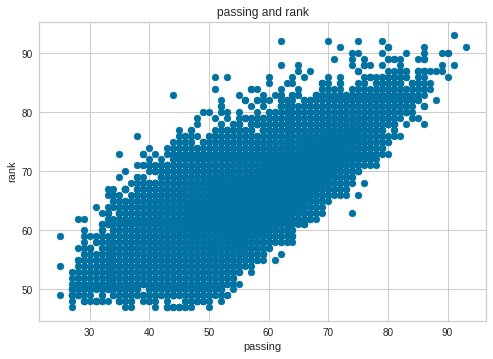

In [ ]:
#4
#a
plt.scatter(newdf['passing'], newdf['rank'])
plt.title('passing and rank')
plt.xlabel('passing')
plt.ylabel('rank')
plt.show()

#b
The direction of passing and rank is positive, the strength is rather strong positive, and the relationship is therefore strong positive linear. 

In [ ]:
#c
print('Pearson’s correlation coefficient: '+ 
      str(sp.pearsonr(newdf['passing'], newdf['rank'])[0]))

Pearson’s correlation coefficient: 0.719127949434651


d)
The correlation is symmetric

In [ ]:
#e
sp.pearsonr(newdf['skill'], newdf['rank'])

(0.6702715916793901, 0.0)

e) The correlation between skill and rank is weaker than the correlation between passing and rank, since the former is around 67% and the latter is around 72%.
f) unitless

In [ ]:
#5
#a
results = smf.ols('rank ~ passing + attacking + defending + skill', data=newdf).fit()
results.summary()   


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rank   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                 1.044e+04
Date:                Fri, 01 Jul 2022   Prob (F-statistic):               0.00
Time:                        18:53:11   Log-Likelihood:                -47856.
No. Observations:               17450   AIC:                         9.572e+04
Df Residuals:                   17445   BIC:                         9.576e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.3278      0.203    124.785      0.000      24.930      25.726
passing       -0.0247      0.010     -2.425      0.015      -0.045      -0.005
attacking      0.6109      0.006     94.005      0.000       0.598       0.624
defending      0.1719      0.002     84.413      0.000       0.168       0.176
skill          0.0066      0.009      0.730      0.465      -0.011       0.024
==============================================================================
Omnibus:                      171.799   Durbin-Watson:                   1.342
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.339
Skew:                           0.234   Prob(JB):                     1.88e-39
Kurtosis:                       3.163   Cond. No.                         790.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
results.params

Intercept    25.327783
passing      -0.024727
attacking     0.610878
defending     0.171856
skill         0.006581
dtype: float64

b)
70.5% variance is explained by our features

c) Attacking and defending are significant at 1% level

d) A 1-unit increase in “defending” is associated with an increase of 0.1719 in ranking

6.

a) 

- passing, defending and attakcing will all do a good job since they are all significant because of their close to zero p-values; however, the p-value for skill is larger than 0.05, making it not significant. 

In [ ]:
#b
x = newdf[['passing','attacking','defending','skill']]
x.head()

,passing,attacking,defending,skill
0,91.0,85.8,26.333333,94.0
1,70.0,69.0,89.000000,62.2
2,75.0,86.0,25.000000,79.0
3,62.0,62.6,91.333333,67.8
4,79.0,86.0,32.000000,81.4


In [ ]:
y = newdf[['rank']]
y.head()

,rank
0,93
1,92
2,92
3,92
4,92


In [ ]:
#c
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.250,
                                                    random_state=123)
x_train.head().sort_index()


,passing,attacking,defending,skill
13548,48.0,55.0,12.666667,54.0
15629,49.0,51.8,25.666667,49.6
17226,52.0,48.0,59.333333,53.2
17874,59.0,46.2,58.000000,57.8
19599,47.0,40.6,46.666667,40.0


In [ ]:
#d
trained = LinearRegression().fit(x_train, y=y_train)          

print('Intercept', trained.intercept_)      
print('Coefficient', trained.coef_)

Intercept [25.16773306]
Coefficient [[-0.02444506  0.61230756  0.17314968  0.00612364]]


e)

The coefficients estimated are quite similar. Attacking becomes slightly higher. Using statsmodel and full dataset, the coefficient for attacking is 0.6109, while using sklearn and training only, we got 0.61230756, slightly higher but with more accuracy after the digits. 

In [ ]:
#f
y_pred2 = trained.predict(x_test)
y_pred2[:3]

array([[64.57617047],
       [72.78035994],
       [70.46341746]])

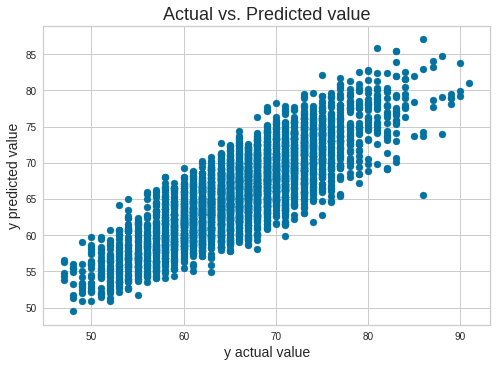

In [ ]:
#g

plt.scatter(y_test, y_pred2)

plt.xlabel('y actual value', size=14)
plt.ylabel('y predicted value', size=14)
plt.title('Actual vs. Predicted value', size=18)

plt.show()

In [ ]:
#h
print('Root Mean Squared Error:', 
      np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

Root Mean Squared Error: 3.744562639987198


h) The RMSE measures the error between the true value and the predicted value. It is the standard deviation of the errors, which is the distance of the points, which is residuals, to the predicted line. The smaller the RMSE, the better the prediction was made. 


i) I think this model does a rather good job predicting since the scatter plot showed a relatively strong positive relation; the RMSE is quite small yet not small enough to ignore the errors. 

In [ ]:
#7a
foot = newdf['preferred_foot'].tolist()
print('Left: '+ str(foot.count('Left')) +'\nRight: '+
      str(foot.count('Right')))

Left: 4406
Right: 13044


In [ ]:
#b
print('actual percentage:'+
      str((foot.count('Right'))/(foot.count('Left')+(foot.count('Right')))*100))


actual percentage:74.75071633237822


In [ ]:
#c
x_knn = newdf[['shooting','passing','dribbling','defending','attacking',
                   'skill','movement','power','mentality','goalkeeping']]
x_knn.head()

,shooting,passing,dribbling,defending,attacking,skill,movement,power,mentality,goalkeeping
0,92.0,91.0,95.0,26.333333,85.8,94.0,90.2,77.8,73.833333,10.8
1,61.0,70.0,81.0,89.000000,69.0,62.2,84.2,78.8,69.166667,12.6
2,93.0,75.0,88.0,25.000000,86.0,79.0,80.6,84.0,70.833333,15.6
3,70.0,62.0,73.0,91.333333,62.6,67.8,64.0,82.4,73.500000,12.8
4,92.0,79.0,86.0,32.000000,86.0,81.4,81.6,84.8,80.666667,10.2


In [ ]:
#d
scaler = StandardScaler().fit(x_knn)
x_scaled = scaler.transform(x_knn)
df_scaled = pd.DataFrame(x_scaled, columns=x_knn.columns)
df_scaled.head(3)

,shooting,passing,dribbling,defending,attacking,skill,movement,power,mentality,goalkeeping
0,2.784312,3.296642,3.315358,-1.393049,3.400164,3.548580,2.774640,1.944282,2.180614,0.281676
1,0.597719,1.229719,1.876719,2.131667,1.593417,0.598209,2.072809,2.066501,1.623697,1.481100
2,2.854847,1.721843,2.596039,-1.468043,3.421673,2.156896,1.651710,2.702042,1.822596,3.480141


In [ ]:
#e
x_knntrain, x_knntest, y_knntrain, y_knntest = train_test_split(df_scaled, foot,
                                                    test_size=0.3,
                                                    random_state=456)
x_knntrain.head(3)


,shooting,passing,dribbling,defending,attacking,skill,movement,power,mentality,goalkeeping
15473,-2.012086,-1.427753,-1.514357,0.444303,-1.826497,-1.572819,-0.968460,-1.013424,-1.558684,0.548214
9895,-0.460310,0.343895,0.746361,0.425554,-0.277857,0.616765,0.692541,-0.646766,-0.305621,-0.251402
12369,0.315578,0.147045,0.129801,-0.886840,0.087794,0.004424,-0.056079,-0.402328,-0.365291,-1.850634


In [ ]:
#f
#error calculation
def knnerror(n, xtr, ytr, xte, yte):
    error = list()
    accuracy = list()

    for k in range(1, n+1):          
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(xtr, ytr)
        y_pred3 = knn.predict(xte)

        error.append(np.mean(y_pred3 != yte))
        accuracy.append(metrics.accuracy_score(yte, y_pred3)) 
    return error, accuracy
error, accuracy = knnerror(30, x_knntrain, y_knntrain, x_knntest, y_knntest)
error

[0.35167144221585483,
 0.43075453677172876,
 0.31098376313276027,
 0.3472779369627507,
 0.2914995224450812,
 0.31499522445081185,
 0.2792741165234002,
 0.29207258834766,
 0.27163323782234955,
 0.2804202483285578,
 0.26743075453677173,
 0.2731614135625597,
 0.26571155682903536,
 0.26857688634192933,
 0.26246418338108884,
 0.26552053486150906,
 0.25959885386819487,
 0.2617000955109838,
 0.25692454632282713,
 0.25921680993314233,
 0.25673352435530084,
 0.25826170009551097,
 0.25787965616045844,
 0.26017191977077364,
 0.25673352435530084,
 0.25845272206303727,
 0.25787965616045844,
 0.2574976122254059,
 0.25807067812798473,
 0.2586437440305635]

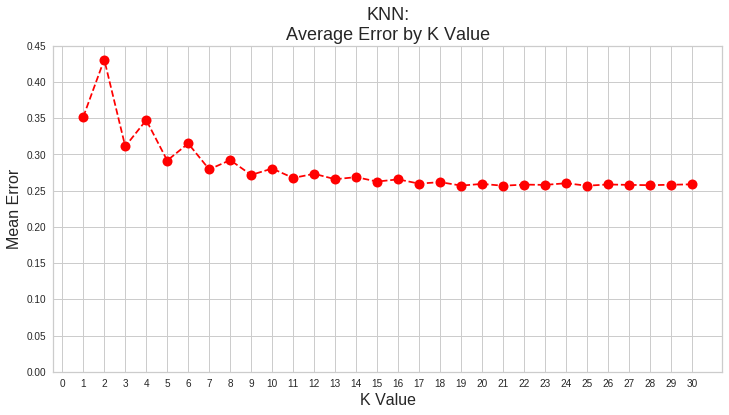

In [ ]:
#plot
# plot error
plt.figure(figsize=(12, 6))

plt.plot(range(1, len(error)+1), error, color='red', linestyle='dashed', marker='o',
         markersize=10)

plt.yticks(np.arange(0, 0.50, .05))
plt.xticks(np.arange(0, 31, 1))

plt.title('KNN:\nAverage Error by K Value', size=18)
plt.xlabel('K Value', size=16)
plt.ylabel('Mean Error', size=16)
plt.show()

In [ ]:
#g
mins = np.where(error==min(error))[0]

print('Minimum error found at:')
for i in mins:
    print('k = {}, error = {}'.format(i+1, error[i]))

Minimum error found at:
k = 21, error = 0.25673352435530084
k = 25, error = 0.25673352435530084


In [ ]:
#we use either 21 or 25
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(x_knntrain, y_knntrain)
y_pred4 = knn.predict(x_knntest)
y_pred4[:3]

array(['Right', 'Right', 'Right'], dtype='<U5')

In [ ]:
#h
print(metrics.confusion_matrix(y_knntest, y_pred4))
print('Approximately 1259 players actually prefer left foot were predicted to prefer right foot ')

[[  48 1278]
 [  66 3843]]
Approximately 1259 players actually prefer left foot were predicted to prefer right foot 


In [ ]:
#i
print(metrics.classification_report(y_knntest, y_pred4))

              precision    recall  f1-score   support

        Left       0.42      0.04      0.07      1326
       Right       0.75      0.98      0.85      3909

    accuracy                           0.74      5235
   macro avg       0.59      0.51      0.46      5235
weighted avg       0.67      0.74      0.65      5235



j)

- This model does a rather good job predicting, since the accuracy is around 0.74. However, its prediction on left is much lower, as the recall is only 0.05 and the precision with only 0.44.

In [ ]:
#8a
df_scaled.head()

,shooting,passing,dribbling,defending,attacking,skill,movement,power,mentality,goalkeeping
0,2.784312,3.296642,3.315358,-1.393049,3.400164,3.548580,2.774640,1.944282,2.180614,0.281676
1,0.597719,1.229719,1.876719,2.131667,1.593417,0.598209,2.072809,2.066501,1.623697,1.481100
2,2.854847,1.721843,2.596039,-1.468043,3.421673,2.156896,1.651710,2.702042,1.822596,3.480141
3,1.232536,0.442320,1.054640,2.262906,0.905132,1.117771,-0.290023,2.506491,2.140834,1.614369
4,2.784312,2.115543,2.390519,-1.074325,3.421673,2.379565,1.768682,2.799817,2.996099,-0.118132


In [ ]:
#b
kmsample = df_scaled.sample(n=5000, random_state=2022).reset_index(drop=True)
kmsample.head()

,shooting,passing,dribbling,defending,attacking,skill,movement,power,mentality,goalkeeping
0,1.373606,2.115543,1.465680,1.550464,1.830015,1.748668,0.037498,1.944282,2.180614,0.948023
1,1.937889,0.934444,1.876719,-0.849343,1.959068,1.377552,2.049414,1.870951,1.404908,0.148406
2,1.020930,-0.246654,-0.795038,-0.736852,1.120221,-0.979033,-1.576714,0.990972,0.310965,0.281676
3,0.456648,-0.345079,0.129801,-1.580534,0.173830,-0.552250,1.090245,1.039860,-0.703419,-1.051018
4,-1.377269,-0.541929,-1.206077,0.763027,-0.600490,-1.591375,-0.430389,0.013218,-0.206172,0.814753


In [ ]:
#c
def kmerror(n):
    error = list()
    sil = list()

    for k in range(2,n+1): 
        kmeans = KMeans(n_clusters=k, random_state=47)
        kmeans.fit(kmsample)
        error.append(kmeans.inertia_)
        score = metrics.silhouette_score(kmsample, kmeans.labels_)
        sil.append(score)
    return error, sil
kmerror, sil = kmerror(20)
kmerror

[30847.1063361297,
 25514.329414296524,
 22325.83306380061,
 20446.193863352895,
 18799.569987115643,
 17815.693162689735,
 16969.865729386584,
 16217.942602696026,
 15538.526324954088,
 14934.173763346318,
 14482.876687004564,
 14064.001776867586,
 13727.319395867318,
 13393.35703318101,
 13029.89381355772,
 12733.80266710625,
 12494.120597865574,
 12248.793249478778,
 12041.98360356869]

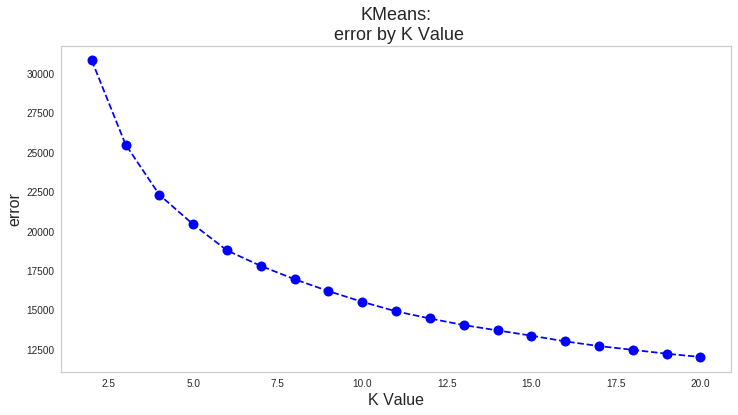

In [ ]:
#d
# plot error
plt.figure(figsize=(12, 6))
plt.grid(False)

plt.plot(range(2, len(kmerror)+2), kmerror, color='blue', linestyle='dashed', marker='o',
         markersize=10)

#plt.yticks(np.arange(0, .76, .05)) # start y ticks at 0
#plt.xticks(np.arange(0, 31, 1))  # integer x ticks

# title & label axes
plt.title('KMeans:\n error by K Value', size=18)
plt.xlabel('K Value', size=16)
plt.ylabel('error', size=16)
plt.show()

In [ ]:
#e
from kneed import KneeLocator
kl = KneeLocator(range(2, 21), kmerror, 
                 curve='convex', direction='decreasing')

print('elbow value: '+str(kl.elbow))

elbow value: 6


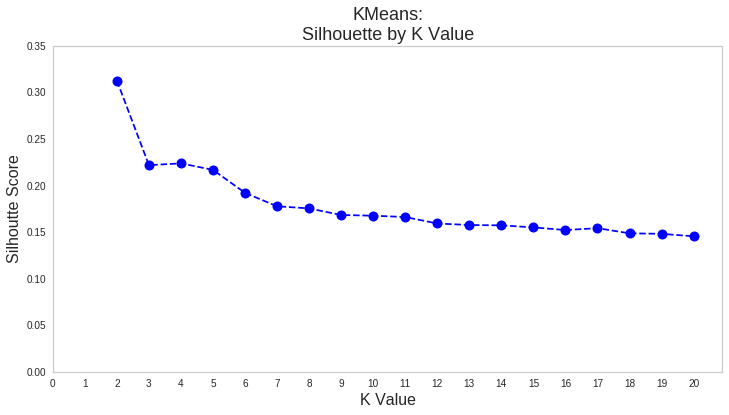

In [ ]:
#f
# plot Silhouette
plt.figure(figsize=(12, 6))
plt.grid(False)

plt.plot(range(2, len(sil)+2), sil, color='blue', linestyle='dashed', marker='o',
         markersize=10)

plt.yticks(np.arange(0, .40, .05)) # start y ticks at 0
plt.xticks(np.arange(0, 21, 1))  # integer x ticks

# title & label axes
plt.title('KMeans:\nSilhouette by K Value', size=18)
plt.xlabel('K Value', size=16)
plt.ylabel('Silhoutte Score', size=16)
plt.show()

In [ ]:
#g
#From the graph, we can see that sil is max at k=2
k=2
kmeans = KMeans(n_clusters=k)
kmeans.fit(kmsample)
kmsample['{} clusters'.format(k)] = kmeans.labels_
kmsample.head()


,shooting,passing,dribbling,defending,attacking,skill,movement,power,mentality,goalkeeping,2 clusters
0,1.373606,2.115543,1.465680,1.550464,1.830015,1.748668,0.037498,1.944282,2.180614,0.948023,1
1,1.937889,0.934444,1.876719,-0.849343,1.959068,1.377552,2.049414,1.870951,1.404908,0.148406,1
2,1.020930,-0.246654,-0.795038,-0.736852,1.120221,-0.979033,-1.576714,0.990972,0.310965,0.281676,1
3,0.456648,-0.345079,0.129801,-1.580534,0.173830,-0.552250,1.090245,1.039860,-0.703419,-1.051018,1
4,-1.377269,-0.541929,-1.206077,0.763027,-0.600490,-1.591375,-0.430389,0.013218,-0.206172,0.814753,0


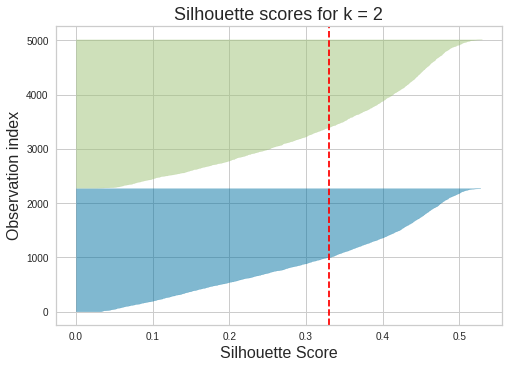

In [ ]:
kmeans = KMeans(n_clusters=k)

visualizer = SilhouetteVisualizer(kmeans, 
                                  colors='yellowbrick') 
visualizer.fit(kmsample) 

# label axes, etc
plt.title('Silhouette scores for k = {}'.format(k), size=18)
plt.xlabel('Silhouette Score', size=16)
plt.ylabel('Observation index', size=16)
plt.show()

In [ ]:
#h
def plot_clusters(k):
    plt.figure(figsize=(8,6))
    
    for i in range(k):
        subset = kmsample[kmsample['{} clusters'.format(k)] == i]
        plt.scatter(subset['attacking'], 
                    subset['defending'],
                    label='Cluster {}'.format(i))

    plt.xlabel('attacking', size=16)
    plt.ylabel('defending', size=16)

    plt.title('Cluster Assignments, k={}'.format(k), size=18)
    plt.legend(loc='upper left', prop={'size': 10})
    plt.show()

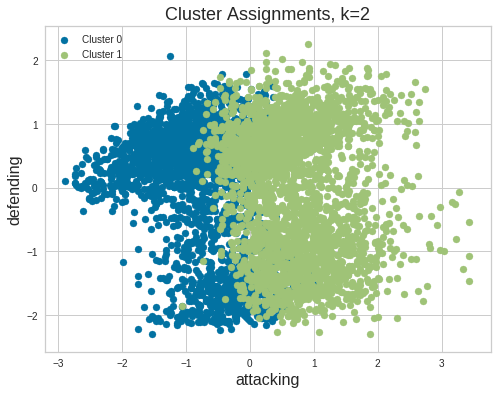

In [ ]:
plot_clusters(k)

Below the g and f using the more robust result of k=2 from silhoutte score, I also displayed k=6 from elbow. Both of them are quite overlapped by the other clusters. 

In [ ]:
#g.2
#From the elbow, we can see that the best number of cluster is 6
k=6
kmeans = KMeans(n_clusters=k)
kmeans.fit(kmsample)
kmsample['{} clusters'.format(k)] = kmeans.labels_
kmsample.head()

,shooting,passing,dribbling,defending,attacking,skill,movement,power,mentality,goalkeeping,2 clusters,6 clusters
0,1.373606,2.115543,1.465680,1.550464,1.830015,1.748668,0.037498,1.944282,2.180614,0.948023,1,3
1,1.937889,0.934444,1.876719,-0.849343,1.959068,1.377552,2.049414,1.870951,1.404908,0.148406,1,3
2,1.020930,-0.246654,-0.795038,-0.736852,1.120221,-0.979033,-1.576714,0.990972,0.310965,0.281676,1,4
3,0.456648,-0.345079,0.129801,-1.580534,0.173830,-0.552250,1.090245,1.039860,-0.703419,-1.051018,1,4
4,-1.377269,-0.541929,-1.206077,0.763027,-0.600490,-1.591375,-0.430389,0.013218,-0.206172,0.814753,0,0


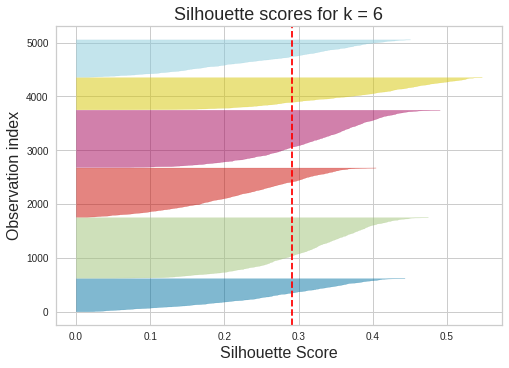

In [ ]:
kmeans = KMeans(n_clusters=k)

visualizer = SilhouetteVisualizer(kmeans, 
                                  colors='yellowbrick') 
visualizer.fit(kmsample) 

# label axes, etc
plt.title('Silhouette scores for k = {}'.format(k), size=18)
plt.xlabel('Silhouette Score', size=16)
plt.ylabel('Observation index', size=16)
plt.show()

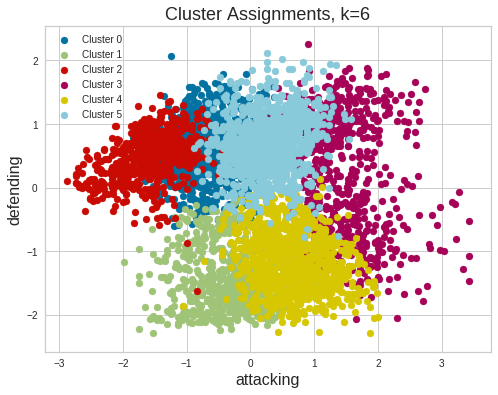

In [ ]:
#k.2
plot_clusters(k)

(i) Reflecting on the above analysis, do you think clustering is a meaningful technique for this data? What further analyses would be you interested in running? (You don’t actually have to run anything else!)

- Clustering is a meaningful technique for this data, as the two clusters have somewhat clear edges, which shows that they are valid clusters for interpretation. However, there are still overlaps and when changing the value of k, the boundaries are still somewhat visible while not clear-cut. It is understandable as the data points are close to each other. Since kmeans is a quite costy algorithm, maybe changing the random seed and average out results could increase the accuracy of our predication, or maybe having a more powerful laptop to run more data points that exceeds 5000. 